# All about Graphs

> Esta guía está hecha en base a lo que he ido usando durante el tiempo, si encuentras algo que según tu criterio es interesante de utilizar y no lo he incluido POR FAVOR házmelo saber para agregarlo a mi toolkit diario de gráficos 🥺




Debo confesar que pierdo mucho tiempo customizando mis gráficos y probando diferes opciones para mostrar mis análisis . Lo más triste de esto es que **siempre** olvido la sintaxis de lo que uso y reviso las mismas páginas una y otra vez 😔. Eso me ha motivado a hacer una guía sobre todo aquello que ocupo a diario para plotear gráficos con estilo 💅🏻

Existen muchas librerías para hacer gráficos en python, si se trata de datasets que son **manejables mediante pandas** , utilizo principalmente 2 librerías:

- Seaborn
- Matplotlib

**1. ¿Por qué en ese orden?**

Si hay algo innegable es que Matplotlib es la librería por excelencia para graficar en python. Sin embargo, utilizo Seaborn como librería principal porque tiene una interfaz más amigable para setear los gráficos. Además está basada en Matplotlib, de modo que se complementan muy bien.


  
*TIP: Casi todos los gráficos de Seaborn tienen la misma sintaxis*

> sns.nombredelgrafico( data= nombre_dataset, x= variable_eje_x , y= variable_eje_y)





## Liberías utilizadas
 

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing
https://nbviewer.jupyter.org/github/fperez/nb-slideshow-template/blob/master/install-support.ipynb

## Dataset

Para este ejercicio se usará un dataset precargado en la librería de Seaborn llamada *tips*

In [11]:
data =  sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Gridspec

Algo que me molesta mucho de los gráficos que es por defecto solo queda **uno por celda** y se van acumulando muchos hacia abajo. Una buena solución es utilizar Gridspec para juntar todos lo que sea relevante en una sola celda y así el notebook queda más compacto y ordenado.

Para este ejemplo, se busca hacer 1 gráficos de líneas que considere(total_bill, tip) y otro de puntos que considere(size,tip)

Ejemplo uso de gridspec


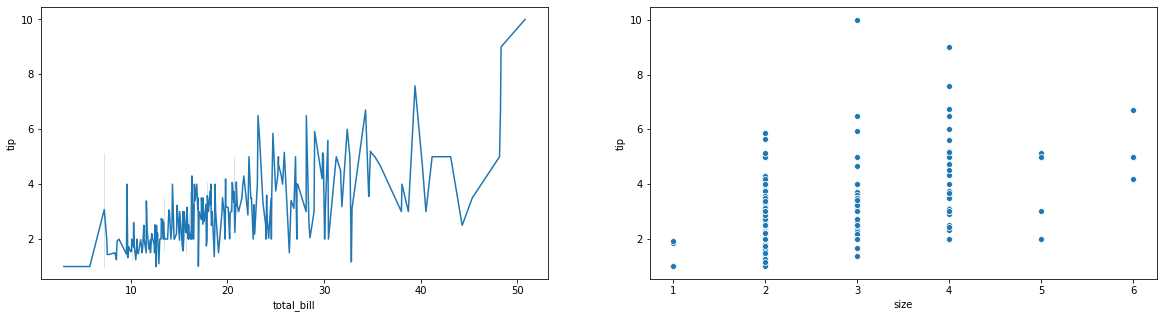

In [33]:
#Este elemento es como el "papel" donde irá el gráfico.
#figsize setea el valor. OJO acá: Por alguna extraña razón los valores son (columna,fila) en vez de (fila,columna)
fig = plt.figure(figsize=(20, 5))

#Grilla que segmenta el espacio. en (filas,columnas). hspace paremetriza distsancia interfilas y wspace intercolumnas
gs=  gridspec.GridSpec(1,2,fig,hspace=0.5)

#Nos ubica en una posición de la grilla
fig.add_subplot(gs[0,0])

#Creación del gráfico de línea
ax=sns.lineplot(data=data,x='total_bill',y='tip')

#Se cambia la ubicación en la grilla
fig.add_subplot(gs[0,1])
#Creación del gráfico de puntos
ax=sns.scatterplot(data=data,x='size',y='tip')

print('Ejemplo uso de gridspec')

# 2. Gráficos de barras

Para el clásico de barras se necesita tener la data agrupada, de modo que solo exista una combinación única de valores (x,y). Por ejemplo: Si se quisiera contar la cantidad de registros según la variable sex no podriamos hacerlo tal cual está el dataset.Para saltarse el paso de la agrupación es mejor usar gráficos **específicos para variables categóricas**

Text(0.5, 1.0, 'Countplot')

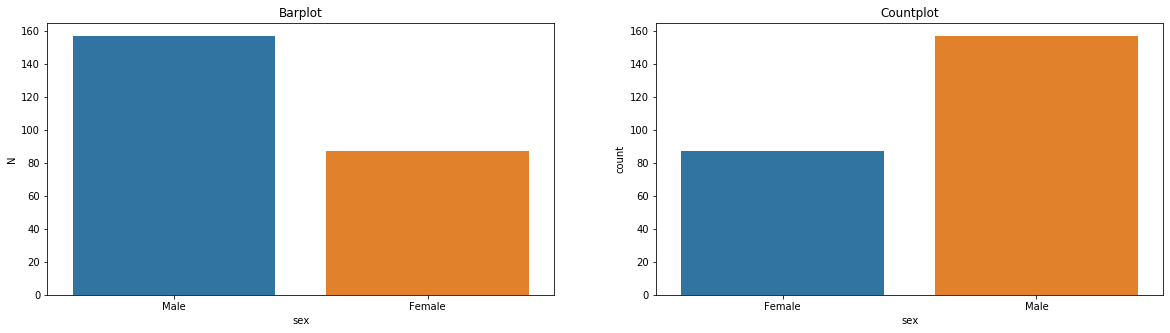

In [61]:
fig = plt.figure(figsize=(20, 5))
gs=  gridspec.GridSpec(1,2,fig,hspace=0.5)

#Usando Barplot
fig.add_subplot(gs[0,0])
d=data.groupby('sex')['tip'].agg(N='count').reset_index()
sns.barplot(data=d,x='sex',y='N')
plt.title('Barplot')

#Usando Countplot
fig.add_subplot(gs[0,1])
sns.countplot(data=data,x='sex',order=['Female','Male'])
plt.title('Countplot')

Si a este mismo caso se le quisiera agregar otro nivel más de complejidad (por ejemplo, conteo por sex y smoker) se debe rehacer la agrupación para el gráficos de barras y luego agregar el parámetro **hue**='smoker'

Text(0.5, 1.0, 'Countplot')

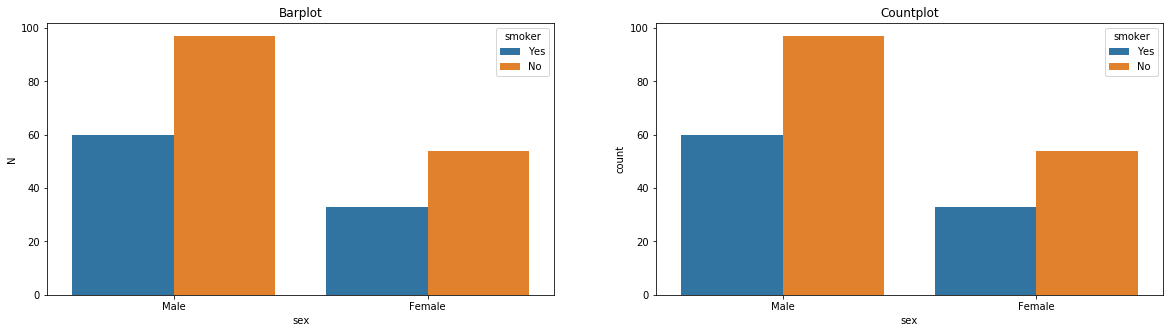

In [39]:
fig = plt.figure(figsize=(20, 5))
gs=  gridspec.GridSpec(1,2,fig,hspace=0.5)

#Usando Barplot
fig.add_subplot(gs[0,0])
d=data.groupby(['sex','smoker'])['tip'].agg(N='count').reset_index()
sns.barplot(data=d,x='sex',y='N',hue='smoker')
plt.title('Barplot')

#Usando Countplot
fig.add_subplot(gs[0,1])
sns.countplot(data=data,x='sex',hue='smoker')
plt.title('Countplot')

## 3. Gráficos para Distribuciones

Ideales para entender el comportamiento de variables contínuas

Text(0.5, 1.0, 'Kdeplot: LA SINTAXIS ES UN POCO DIFENTE!!')

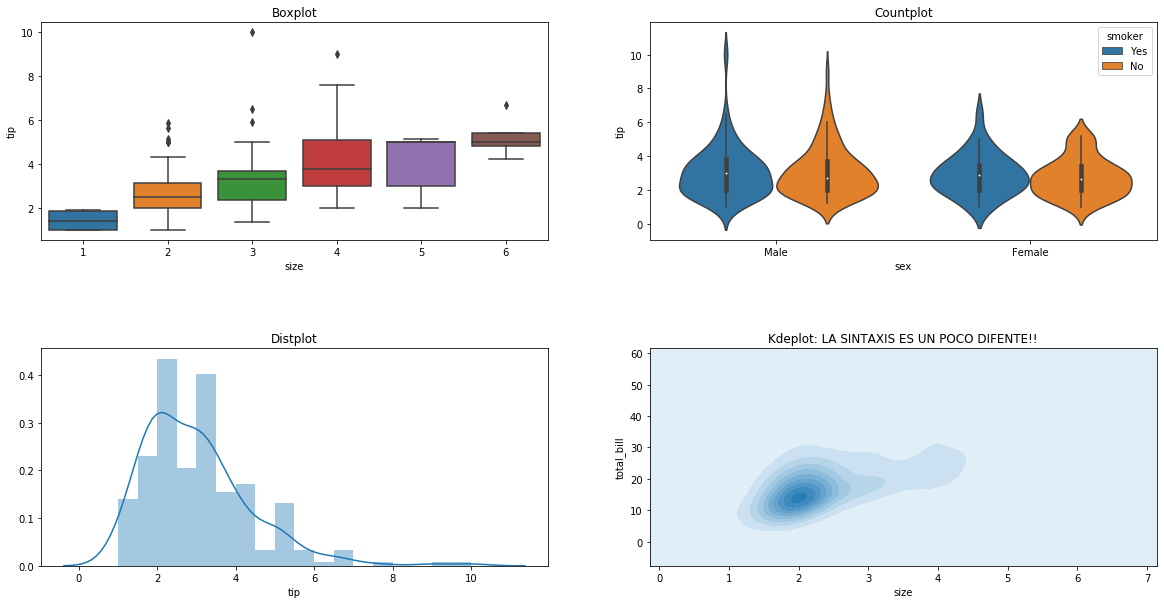

In [70]:
fig = plt.figure(figsize=(20, 10))
gs=  gridspec.GridSpec(2,2,fig,hspace=0.5)


fig.add_subplot(gs[0,0])
d=data.groupby(['sex','smoker'])['tip'].agg(N='count').reset_index()
sns.boxplot(data=data,x='size',y='tip')
plt.title('Boxplot')


fig.add_subplot(gs[0,1])
sns.violinplot(data=data,x='sex',hue='smoker',y='tip')
plt.title('Countplot')


fig.add_subplot(gs[1,0])
sns.distplot(data['tip'])
plt.title('Distplot')

fig.add_subplot(gs[1,1])
sns.kdeplot(data['size'],data['total_bill'],shade=True)
plt.title('Kdeplot: LA SINTAXIS ES UN POCO DIFENTE!!')

### Los [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) son maravillosos,pero no puedes ingresarlos en un gridspec!! 💔

Text(0.5, 1, 'Ejemplo de jointplot')

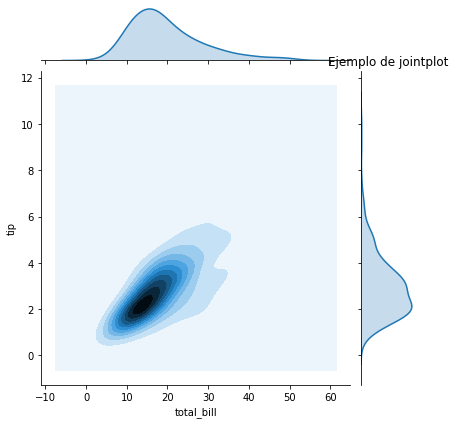

In [71]:
#Parámetro kind cambia la vizualizacióndel centro. con kind=hex queda hermoso C:
sns.jointplot(data=data ,x='total_bill',y='tip',kind='kde')
plt.title('Ejemplo de jointplot')

## 2. Colores

https://seaborn.pydata.org/tutorial/color_palettes.html

## 3. Jugando con los Ejes